<a href="https://colab.research.google.com/github/AaronReichert/build-week-2/blob/master/crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %%capture
# import sys
 
# # If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
#     !pip install category_encoders==2.*
#     !pip install eli5
#     !pip install pdpbox
#     !pip install shap
 
# # If you're working locally:
# else:
#     DATA_PATH = '../data/'

In [2]:
%%capture
!pip install category_encoders==2.*

In [3]:
# important imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [4]:
file='https://www.kaggle.com/neonninja/nzta-crash-analysis-system-cas/download'
dfcrash=pd.read_csv(file, error_bad_lines=False)
dfcrash.sample()

b'Skipping line 6: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 4\nSkipping line 20: expected 1 fields, saw 2\nSkipping line 32: expected 1 fields, saw 8\nSkipping line 41: expected 1 fields, saw 9\nSkipping line 45: expected 1 fields, saw 2\nSkipping line 46: expected 1 fields, saw 6\nSkipping line 51: expected 1 fields, saw 2\nSkipping line 52: expected 1 fields, saw 3\nSkipping line 53: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 2\nSkipping line 74: expected 1 fields, saw 2\nSkipping line 75: expected 1 fields, saw 2\nSkipping line 76: expected 1 fields, saw 2\nSkipping line 77: expected 1 fields, saw 2\nSkipping line 84: expected 1 fields, saw 2\nSkipping line 86: expected 1 fields, saw 2\nSkipping line 94: expected 1 fields, saw 2\nSkipping line 167: expected 1 fields, saw 2\nSkipping line 170: expected 1 fields, saw 2\nSkipping line 171: expected 1 fields, saw 2\nSkipping line 172: expected 1

,<!DOCTYPE html>
97,"<script id=""gapi-target"" nonce=""nB/wW7TnLZ..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file='/content/drive/My Drive/data sets/Crash_Analysis_System_CAS_data.csv'
dfcrash=pd.read_csv(file, error_bad_lines=False)
dfcrash.sample()

,X,Y,OBJECTID,advisorySpeed,animals,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashDistance,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,easting,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersectionMidblock,junctionType,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,northing,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,outdatedLocationDescription,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadCurvature,roadLane,roadMarkings,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
189046,1766233.0,5905334.0,185047,NaN,0.0,522400.0,0.0,0.0,0.0,3.0,0.0,West,50.0,2017,FITZROY ST,CARRUTH ROAD,Non-Injury Crash,No,2017,0.0,East,0.0,1766233.0,0.0,0.0,Flat,0.0,NaN,0.0,Midblock,Nil (Default),0.0,Dark,672003.0,0.0,0.0,0.0,5905334.0,2.0,0.0,0.0,0.0,Current location,0.0,2.0,NaN,0.0,0.0,Auckland Region,Nil,Straight,2-way,NaN,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,On,0.0,0.0,NaN,76.0,Auckland,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null


In [ ]:
target='crashSeverity'
features=dfcrash.columns.drop([target,'OBJECTID','roadMarkings','minorInjuryCount','fatalCount','seriousInjuryCount'])

train, test = train_test_split(dfcrash, train_size=0.80, test_size=0.20, 
                              stratify=dfcrash[target], random_state=42)

def wrangle(df):
  df=df.copy()
  df['holiday']=df['holiday'].replace('unknown',np.nan)
  df=df.replace(0,np.nan)
  return df

train=wrangle(train)
test=wrangle(test)

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
baseline=(y_train.value_counts(normalize=True)[0])
print(f'The majority class baseline is: {baseline:.4%}')

The majority class baseline is: 71.0987%


In [ ]:
df_wrangle=wrangle(dfcrash)
df_wrangle.shape

(705824, 79)

In [ ]:
dfcrash['crashSeverity'].value_counts()

Non-Injury Crash    501832
Minor Crash         158452
Serious Crash        39112
Fatal Crash           6428
Name: crashSeverity, dtype: int64

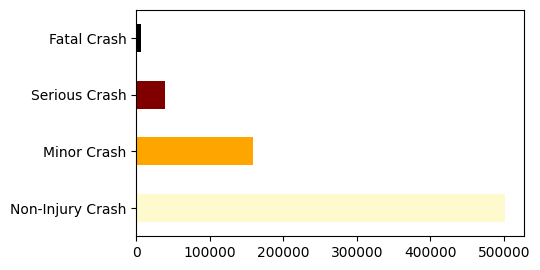

In [ ]:
fig1 = plt.figure(figsize=(5, 3),dpi=100)
dfgraph=pd.DataFrame(dfcrash['crashSeverity'])
dfgraph[' ']=dfcrash['crashSeverity']
graph=dfgraph[' '].value_counts()
graph.plot(kind='barh',color=['lemonchiffon','orange','maroon','k'])
plt.show()

In [ ]:
dfcrash['crashSeverity'].value_counts(normalize=True)

Non-Injury Crash    0.710987
Minor Crash         0.224492
Serious Crash       0.055413
Fatal Crash         0.009107
Name: crashSeverity, dtype: float64

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                  precision    recall  f1-score   support

     Fatal Crash       0.25      0.00      0.00      1286
     Minor Crash       0.29      0.00      0.00     31690
Non-Injury Crash       0.71      1.00      0.83    100367
   Serious Crash       0.40      0.00      0.00      7822

        accuracy                           0.71    141165
       macro avg       0.41      0.25      0.21    141165
    weighted avg       0.60      0.71      0.59    141165

Train accuracy: 71.0848%
Test accuracy: 71.0849%
CPU times: user 1min 20s, sys: 16 s, total: 1min 36s
Wall time: 1min 6s


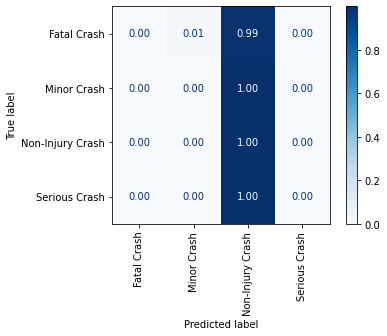

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    StandardScaler(),
    LogisticRegression()
)

pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.04      0.04      0.04      1286
     Minor Crash       0.26      0.28      0.27     31690
Non-Injury Crash       0.74      0.71      0.73    100367
   Serious Crash       0.10      0.11      0.10      7822

        accuracy                           0.58    141165
       macro avg       0.28      0.29      0.28    141165
    weighted avg       0.59      0.58      0.58    141165

Train accuracy: 99.9543%
Test accuracy: 57.7006%
CPU times: user 52.9 s, sys: 306 ms, total: 53.2 s
Wall time: 53.4 s


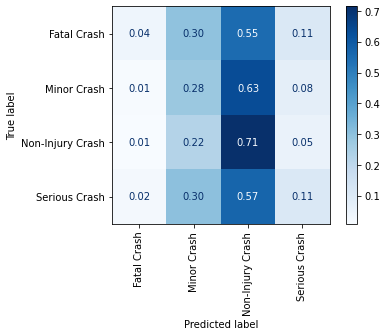

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier()
)

pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.43      0.00      0.00      1286
     Minor Crash       0.56      0.24      0.33     31690
Non-Injury Crash       0.77      0.97      0.86    100367
   Serious Crash       0.41      0.05      0.09      7822

        accuracy                           0.75    141165
       macro avg       0.54      0.31      0.32    141165
    weighted avg       0.70      0.75      0.69    141165

Train accuracy: 89.5259%
Test accuracy: 74.5666%
CPU times: user 9min 29s, sys: 949 ms, total: 9min 30s
Wall time: 5min 2s


<Figure size 1200x800 with 0 Axes>

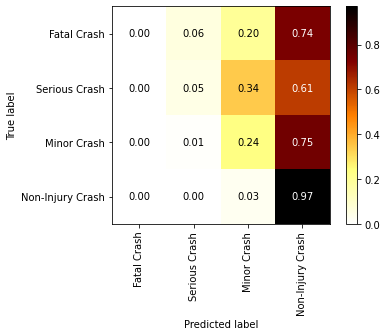

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
fig1 = plt.figure(dpi=200)
plot_confusion_matrix(pipeline, X_test, y_test,
                      labels=['Fatal Crash','Serious Crash','Minor Crash','Non-Injury Crash'],
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='afmhot_r');

<Figure size 1200x800 with 0 Axes>

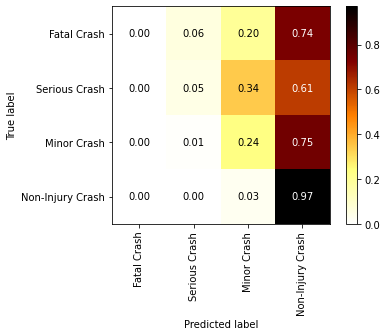

In [ ]:
fig1 = plt.figure(dpi=200)
plot_confusion_matrix(pipeline, X_test, y_test,
                      labels=['Fatal Crash','Serious Crash','Minor Crash','Non-Injury Crash'],
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='afmhot_r');

                  precision    recall  f1-score   support

     Fatal Crash       0.33      0.00      0.00      1286
     Minor Crash       0.57      0.23      0.33     31690
Non-Injury Crash       0.77      0.98      0.86    100367
   Serious Crash       0.51      0.03      0.06      7822

        accuracy                           0.75    141165
       macro avg       0.54      0.31      0.31    141165
    weighted avg       0.70      0.75      0.69    141165

Train accuracy: 74.7038%
Test accuracy: 74.6977%
CPU times: user 11min 6s, sys: 849 ms, total: 11min 7s
Wall time: 5min 46s


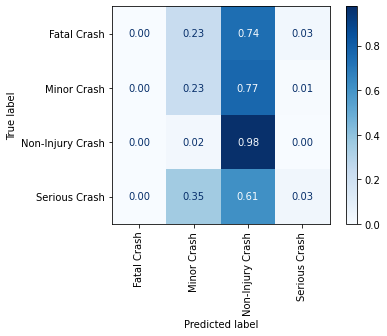

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
train['crashSeverity'].value_counts()

Non-Injury Crash    401465
Minor Crash         126762
Serious Crash        31290
Fatal Crash           5142
Name: crashSeverity, dtype: int64

In [ ]:
Fatal_Crash = train[train[target]=='Fatal Crash']
# Fatal_Crash=Fatal_Crash.append(Fatal_Crash)
Fatal_Crash.shape[0]

Serious_Crash = train[train[target]=='Serious Crash'].sample(Fatal_Crash.shape[0])
Minor_Crash = train[train[target]=='Minor Crash'].sample(Fatal_Crash.shape[0])
Non_Injury_Crash = train[train[target]=='Non-Injury Crash'].sample(Fatal_Crash.shape[0])

train_undersample  = pd.concat([Fatal_Crash,
                    Serious_Crash,
                    Minor_Crash,
                    Non_Injury_Crash],
                            axis=0)

In [ ]:
train_undersample['crashSeverity'].value_counts()

Non-Injury Crash    5142
Minor Crash         5142
Serious Crash       5142
Fatal Crash         5142
Name: crashSeverity, dtype: int64

In [ ]:
train_undersample=wrangle(train_undersample)
test=wrangle(test)

X_train_undersample = train_undersample[features]
y_train_undersample = train_undersample[target]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                  precision    recall  f1-score   support

     Fatal Crash       0.01      0.67      0.03      1286
     Minor Crash       0.23      0.14      0.18     31690
Non-Injury Crash       0.79      0.29      0.42    100367
   Serious Crash       0.06      0.21      0.10      7822

        accuracy                           0.26    141165
       macro avg       0.28      0.33      0.18    141165
    weighted avg       0.62      0.26      0.35    141165

Train accuracy: 26.2842%
Test accuracy: 25.6537%
CPU times: user 17.1 s, sys: 1.71 s, total: 18.8 s
Wall time: 16.3 s


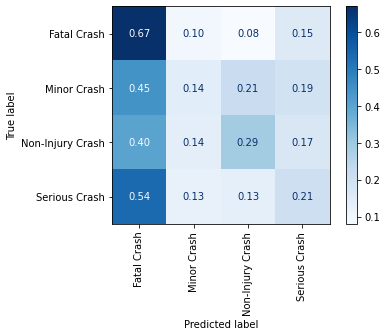

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    StandardScaler(),
    LogisticRegression()
)

pipeline.fit(X_train_undersample, y_train_undersample)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.38      0.04      1286
     Minor Crash       0.22      0.27      0.24     31690
Non-Injury Crash       0.76      0.34      0.47    100367
   Serious Crash       0.07      0.26      0.11      7822

        accuracy                           0.32    141165
       macro avg       0.27      0.31      0.21    141165
    weighted avg       0.59      0.32      0.40    141165

Train accuracy: 34.9248%
Test accuracy: 32.2580%
CPU times: user 14.6 s, sys: 51.4 ms, total: 14.7 s
Wall time: 14.7 s


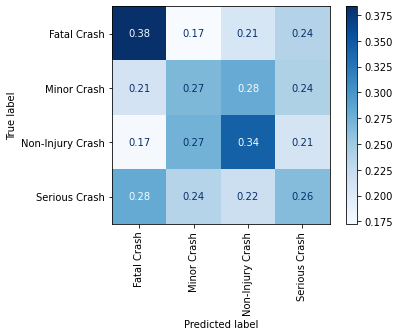

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier()
)

pipeline.fit(X_train_undersample, y_train_undersample)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.65      0.04      1286
     Minor Crash       0.24      0.23      0.23     31690
Non-Injury Crash       0.83      0.42      0.56    100367
   Serious Crash       0.09      0.25      0.13      7822

        accuracy                           0.37    141165
       macro avg       0.29      0.39      0.24    141165
    weighted avg       0.65      0.37      0.46    141165

Train accuracy: 39.5600%
Test accuracy: 37.1884%
CPU times: user 1min, sys: 218 ms, total: 1min
Wall time: 37.6 s


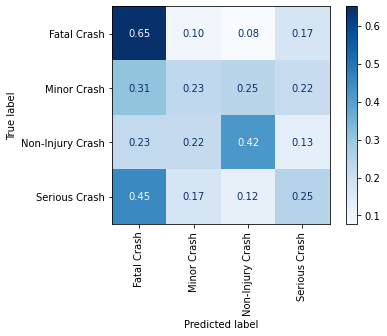

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

pipeline.fit(X_train_undersample, y_train_undersample)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(65+23+42+25)/4

38.75

                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.69      0.03      1286
     Minor Crash       0.22      0.15      0.18     31690
Non-Injury Crash       0.81      0.36      0.49    100367
   Serious Crash       0.07      0.20      0.10      7822

        accuracy                           0.30    141165
       macro avg       0.28      0.35      0.20    141165
    weighted avg       0.63      0.30      0.40    141165

Train accuracy: 31.9193%
Test accuracy: 30.4268%
CPU times: user 48 s, sys: 82.6 ms, total: 48 s
Wall time: 30.6 s


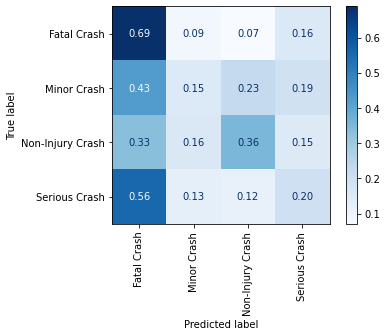

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train_undersample, y_train_undersample)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(67+16+36+21)/4

35.0

In [ ]:
Fatal_Crash = train[train[target]=='Fatal Crash']
Fatal_Crash=Fatal_Crash.append(Fatal_Crash)

Serious_Crash = train[train[target]=='Serious Crash'].sample(Fatal_Crash.shape[0])
Minor_Crash = train[train[target]=='Minor Crash'].sample(Fatal_Crash.shape[0])
Non_Injury_Crash = train[train[target]=='Non-Injury Crash'].sample(Fatal_Crash.shape[0])

train_undersample  = pd.concat([Fatal_Crash,
                    Serious_Crash,
                    Minor_Crash,
                    Non_Injury_Crash],
                            axis=0)

In [ ]:
Fatal_Crash = train[train[target]=='Fatal Crash']
Fatal_Crash_over_under=Fatal_Crash.append(Fatal_Crash)
Fatal_Crash_over_under=Fatal_Crash_over_under.append(Fatal_Crash)
Fatal_Crash_over_under=Fatal_Crash_over_under.append(Fatal_Crash)
Fatal_Crash_over_under=Fatal_Crash_over_under.append(Fatal_Crash)

Serious_Crash_over_under = train[train[target]=='Serious Crash'].sample(Fatal_Crash_over_under.shape[0])
Minor_Crash_over_under = train[train[target]=='Minor Crash'].sample(Fatal_Crash_over_under.shape[0])
Non_Injury_Crash_over_under = train[train[target]=='Non-Injury Crash'].sample(Fatal_Crash_over_under.shape[0])

train_over_under  = pd.concat([Fatal_Crash_over_under,
                    Serious_Crash_over_under,
                    Minor_Crash_over_under,
                    Non_Injury_Crash_over_under],
                            axis=0)

In [ ]:
train_undersample=wrangle(train_undersample)

X_train_over_under = train_over_under[features]
y_train_over_under = train_over_under[target]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.49      0.03      1286
     Minor Crash       0.27      0.17      0.21     31690
Non-Injury Crash       0.79      0.44      0.56    100367
   Serious Crash       0.08      0.29      0.13      7822

        accuracy                           0.37    141165
       macro avg       0.29      0.35      0.23    141165
    weighted avg       0.63      0.37      0.46    141165

Train accuracy: 38.5636%
Test accuracy: 37.0113%
CPU times: user 28.1 s, sys: 5.87 s, total: 34 s
Wall time: 24.7 s


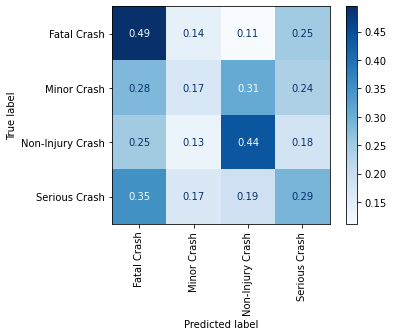

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    StandardScaler(),
    LogisticRegression()
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(47+16+44+30)/4

34.25

                  precision    recall  f1-score   support

     Fatal Crash       0.03      0.15      0.04      1286
     Minor Crash       0.23      0.33      0.28     31690
Non-Injury Crash       0.77      0.40      0.52    100367
   Serious Crash       0.08      0.35      0.12      7822

        accuracy                           0.38    141165
       macro avg       0.28      0.31      0.24    141165
    weighted avg       0.60      0.38      0.44    141165

Train accuracy: 47.5668%
Test accuracy: 37.9315%
CPU times: user 18.7 s, sys: 56.2 ms, total: 18.8 s
Wall time: 18.8 s


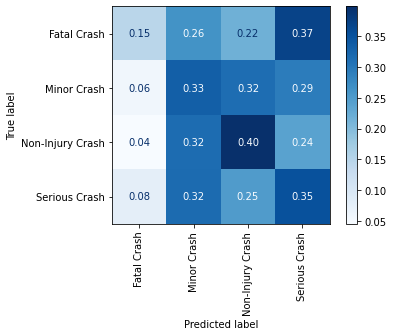

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier()
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(15+33+40+36)/4

31.0

                  precision    recall  f1-score   support

     Fatal Crash       0.04      0.36      0.07      1286
     Minor Crash       0.29      0.27      0.27     31690
Non-Injury Crash       0.84      0.57      0.68    100367
   Serious Crash       0.12      0.46      0.19      7822

        accuracy                           0.50    141165
       macro avg       0.32      0.42      0.30    141165
    weighted avg       0.67      0.50      0.56    141165

Train accuracy: 57.8517%
Test accuracy: 49.7269%
CPU times: user 1min 56s, sys: 285 ms, total: 1min 56s
Wall time: 1min 8s


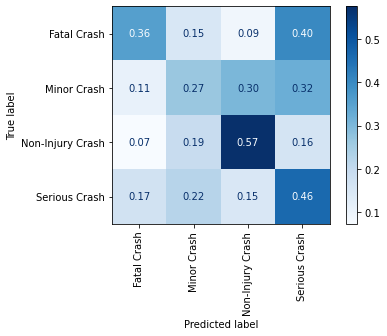

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(34+25+58+48)/4

41.25

                  precision    recall  f1-score   support

     Fatal Crash       0.02      0.49      0.04      1286
     Minor Crash       0.24      0.13      0.17     31690
Non-Injury Crash       0.83      0.50      0.62    100367
   Serious Crash       0.10      0.39      0.16      7822

        accuracy                           0.41    141165
       macro avg       0.30      0.38      0.25    141165
    weighted avg       0.65      0.41      0.49    141165

Train accuracy: 43.6811%
Test accuracy: 40.9230%
CPU times: user 2min 12s, sys: 215 ms, total: 2min 12s
Wall time: 1min 13s


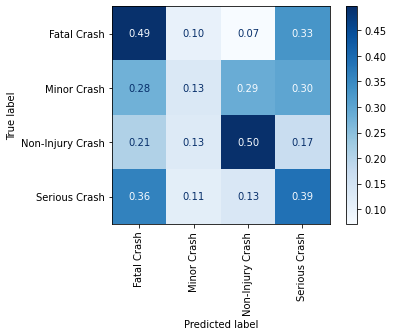

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='Blues');

In [ ]:
(47+13+49+39)/4

37.0

In [ ]:
#=================================================== XGB HYPER PARAMITER TUNING SPACE ===================================================

                  precision    recall  f1-score   support

     Fatal Crash       0.03      0.63      0.06      1286
     Minor Crash       0.30      0.20      0.24     31690
Non-Injury Crash       0.83      0.57      0.67    100367
   Serious Crash       0.10      0.33      0.16      7822

        accuracy                           0.47    141165
       macro avg       0.31      0.43      0.28    141165
    weighted avg       0.66      0.47      0.54    141165

Train accuracy: 49.1996%
Test accuracy: 47.1987%
CPU times: user 1min 10s, sys: 167 ms, total: 1min 11s
Wall time: 42.6 s


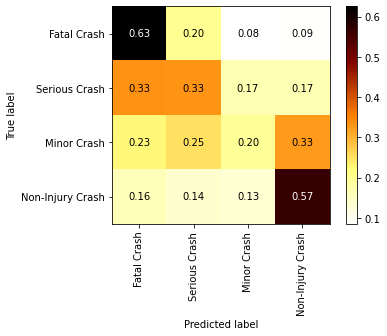

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1,max_depth=4,min_child_weight=.5,subsample=.05,colsample_bytree=.1,learning_rate=.05)
)

pipeline.fit(X_train_over_under, y_train_over_under)

print(classification_report(y_test, pipeline.predict(X_test)))

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Test accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test, 
                      labels=['Fatal Crash','Serious Crash','Minor Crash','Non-Injury Crash'],
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='afmhot_r');

In [ ]:
bounds = [0,1]
plot_confusion_matrix(pipeline, X_test, y_test, 
                      labels=['Fatal Crash','Serious Crash','Minor Crash','Non-Injury Crash'],
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      mpl.colors.BoundaryNorm(bounds, cmap.N)
)

# fig, ax = plt.subplots(figsize=(6, 1))
# fig.subplots_adjust(bottom=0.5)

# plot_confusion_matrix(pipeline, X_test, y_test, 
#                       labels=['Fatal Crash','Serious Crash','Minor Crash','Non-Injury Crash'],
#                       xticks_rotation='vertical', 
#                       normalize='true',
#                       values_format='.2f',
#                       cmap='afmhot_r');

# bounds = [1, 2, 4, 7, 8]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# fig.colorbar(
#     mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
#     cax=ax,
#     boundaries=[0] + bounds + [13],


SyntaxError: ignored

In [ ]:
rf = pipeline.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
n = 10

plt.figure(figsize=(10,n/2),dpi=500)
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='darkorange')
plt.show()

In [ ]:
rf = pipeline.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
n = 10

plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[:n].plot.barh()
plt.show()

In [ ]:
X_train['strayAnimal'].nunique()

In [ ]:
X_train['strayAnimal'].value_counts()

In [ ]:
X_train.shape

In [ ]:
X_train['crashLocation2'].nunique()

In [ ]:
X_train['crashLocation2']

In [ ]:
X_train['crashLocation1']